In [ ]:
#importing the required modules
import seaborn  as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from collections import Counter


In [ ]:
train_data=pd.read_csv('/content/sample_data/train[1].csv')
test_data=pd.read_csv('/content/sample_data/test[1].csv')

In [ ]:
train_data.shape,test_data.shape

((891, 12), (418, 11))

In [ ]:
# List of the column
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# data preproceesing

# examine missing value on train_data
missing_value=train_data.isnull().sum()
missing_value

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
for feature ,value in missing_value.items():
    if value!=0:
        print(feature,':' , value)

Age : 177
Cabin : 687
Embarked : 2


In [ ]:
# Examine missing value on Test_data
missing_value_test=test_data.isnull().sum()
missing_value

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
for feature ,value in missing_value_test.items():
    if value!=0:
        print(feature,':',value)

Age : 86
Fare : 1
Cabin : 327


In [ ]:
import pandas as pd

def handleMissingvalue(df):
    new_df = df.copy()  # Corrected: Added parentheses to call the copy() method

    # Fill null values in 'Age' with mean age and 'Embarked' with mode Embarked
    new_df['Age'] = new_df['Age'].fillna(new_df['Age'].mean())
    new_df['Embarked'] = new_df['Embarked'].fillna(new_df['Embarked'].mode()[0])  # Corrected: Added [0] to access the mode value

    # Median fare for each Pclass
    median_fare_by_pclass = new_df.groupby('Pclass')['Fare'].median()  # Corrected: Changed 'train_data' to 'new_df'
    new_df['Fare'] = new_df.apply(lambda row: median_fare_by_pclass[row['Pclass']] if pd.isnull(row['Fare']) else row['Fare'], axis=1)

    # Drop 'Cabin' column
    new_df = new_df.drop('Cabin', axis=1)

    return new_df

train_data_missing_handled = handleMissingvalue(train_data)

In [ ]:
train_data_missing_handled.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
train_data_missing_handled = handleMissingvalue(train_data)

if sum(train_data_missing_handled.isnull().sum().tolist())==0:
    print('No Missing value')

No Missing value


In [ ]:
# Check duplicate
train_data_missing_handled.duplicated().sum()

0

In [ ]:
train_data_missing_handled.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [ ]:
def outlier(feature):
    plt.figure(figsize=(8, 6))  # Set the size of the plot (optional)

# Create a box plot
    sns.boxplot(y=train_data_missing_handled[feature])

# Customize the plot (optional)
    plt.title("Box Plot")

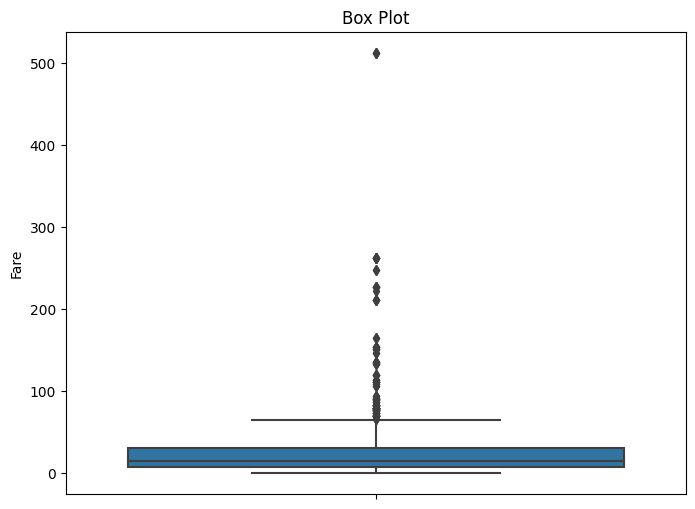

In [ ]:
outlier('Fare')

In [ ]:
Q1=train_data_missing_handled['Fare'].quantile(0.25)
Q3=train_data_missing_handled['Fare'].quantile(0.75)
IQR=Q3-Q1

In [ ]:
#caluclating upper and lower boundary

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

In [ ]:
print('Lower Bound: ', lower_bound)
print('Upper Bound: ', upper_bound)

Lower Bound:  -26.724
Upper Bound:  65.6344


In [ ]:
train_data_missing_handled['Fare'] = train_data_missing_handled['Fare'].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

In [ ]:
train_data_missing_handled['Fare']

0       7.2500
1      65.6344
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

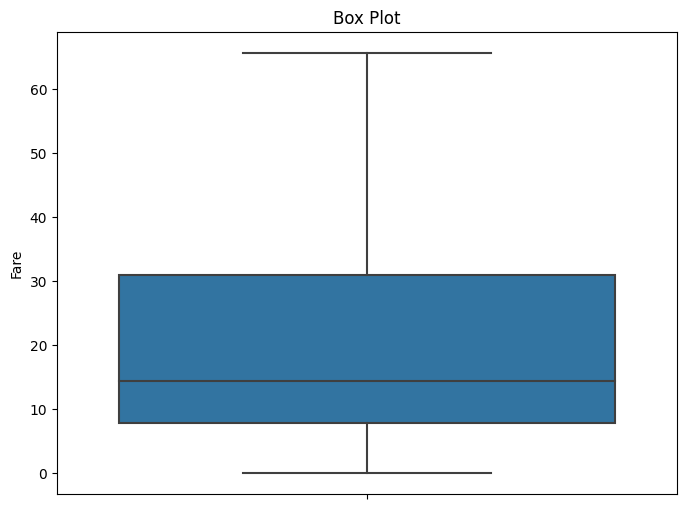

In [ ]:
outlier('Fare')

In [ ]:
train_dataset=train_data_missing_handled.copy()

In [ ]:
train_dataset.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,24.046813
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,20.481625
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,65.634400


In [ ]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [ ]:
train_dataset.duplicated().sum()

0

In [ ]:
train_dataset.isnull().sum().sum()

0

In [ ]:
train_dataset.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [ ]:
train_dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,65.6344,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [ ]:
# To define the age group
age_min=train_dataset['Age'].min()
age_max=train_dataset['Age'].max()
age_min,age_max

(0.42, 80.0)

In [ ]:
age_bins=age_bins = [age_min,12, 24, 36, 48, 60, age_max]
age_labels = ['0-12','13-24', '25-36', '36-48', '49-60', '61+']

train_data_modified=train_dataset.copy()

# Bins the age groups
train_data_modified['age_group']=pd.cut(train_data_modified['Age'],bins=age_bins,labels=age_labels)

In [ ]:
train_data_modified.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,13-24
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,65.6344,C,36-48
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,25-36
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,25-36
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,25-36


In [ ]:
unnecessary_column = ['PassengerId', 'Name', 'Ticket','Age']
train_data_modified.drop(unnecessary_column, axis=1,inplace=True)

In [ ]:
# Rename column
train_data_modified.rename(columns={'age_group':'Age'},inplace=True)

In [ ]:
train_data_modified

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age
0,0,3,male,1,0,7.2500,S,13-24
1,1,1,female,1,0,65.6344,C,36-48
2,1,3,female,0,0,7.9250,S,25-36
3,1,1,female,1,0,53.1000,S,25-36
4,0,3,male,0,0,8.0500,S,25-36
...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,S,25-36
887,1,1,female,0,0,30.0000,S,13-24
888,0,3,female,1,2,23.4500,S,25-36
889,1,1,male,0,0,30.0000,C,25-36


In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
new_df = train_data_modified.copy()
# Specify the columns to be one-hot encoded
columns_to_encode = ['Pclass', 'Sex', 'Age', 'Embarked', 'SibSp']
new_df=pd.get_dummies(new_df, columns=columns_to_encode,dtype=int)

In [ ]:
# Apply min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
new_df['Fare'] = scaler.fit_transform(new_df[['Fare']])

In [ ]:
new_df

,Survived,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Age_0-12,Age_13-24,...,Embarked_C,Embarked_Q,Embarked_S,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8
0,0,0,0.110460,0,0,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0
1,1,0,1.000000,1,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,1,0,0.120745,0,0,1,1,0,0,0,...,0,0,1,1,0,0,0,0,0,0
3,1,0,0.809027,1,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0
4,0,0,0.122649,0,0,1,0,1,0,0,...,0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,0.198067,0,1,0,0,1,0,0,...,0,0,1,1,0,0,0,0,0,0
887,1,0,0.457077,1,0,0,1,0,0,1,...,0,0,1,1,0,0,0,0,0,0
888,0,2,0.357282,0,0,1,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0
889,1,0,0.457077,1,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0


In [ ]:
## Train Test Split

from sklearn.model_selection import train_test_split

In [ ]:
X=new_df.drop('Survived',axis=1)
y=new_df['Survived']

# split the dataset into 80% training and 20% testing
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape,X_test.shape

((712, 23), (179, 23))

In [ ]:
y_train.shape,y_test.shape

((712,), (179,))

In [ ]:
from sklearn.metrics import accuracy_score, precision_score,recall_score ,f1_score , confusion_matrix,classification_report

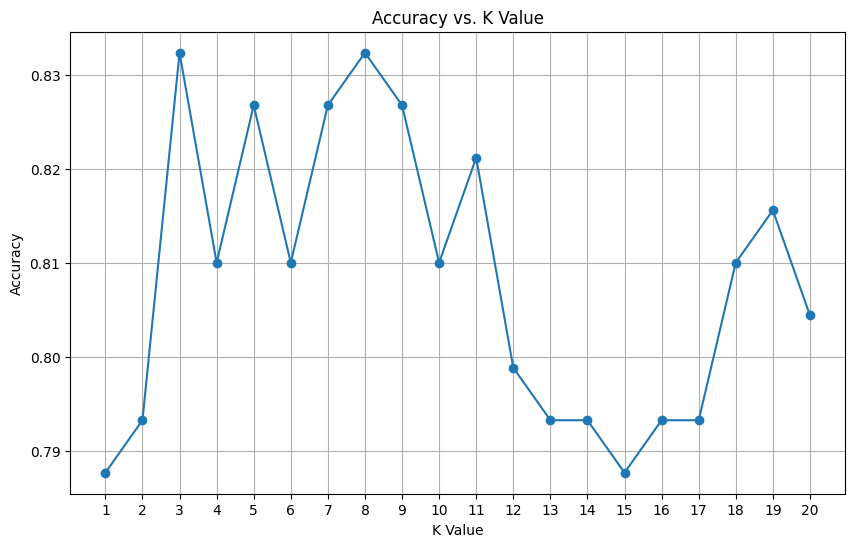

The best K value is K = 3 with an accuracy of 0.83


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming you have X_train, X_test, y_train, y_test from your dataset

# Create lists to store K values and corresponding accuracy scores
k_values = list(range(1, 21))
accuracy_scores = []

# Loop through different K values and train the KNN classifier
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Find the best K value with the highest accuracy
best_k = k_values[np.argmax(accuracy_scores)]

# Plot the accuracy scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o')
plt.title('Accuracy vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

print(f"The best K value is K = {best_k} with an accuracy of {max(accuracy_scores):.2f}")


In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the value of K

# Assuming you have X and y from your dataset

# Perform 5-fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)
accuracy_scores = cross_val_score(knn, X, y, cv=cv, scoring='accuracy')

# Calculate mean and standard deviation of the accuracy scores
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)

# Report the results
print(f"Mean Accuracy: {mean_accuracy:.2f}")
print(f"Standard Deviation: {std_accuracy:.2f}")


Mean Accuracy: 0.79
Standard Deviation: 0.02


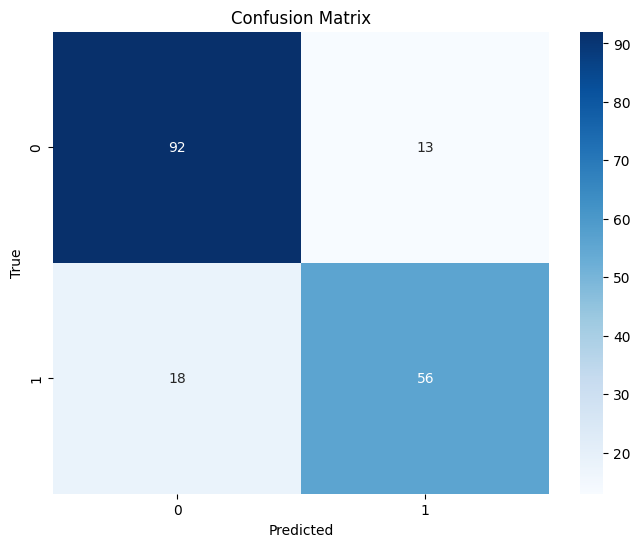

Confusion Matrix:
[[92 13]
 [18 56]]


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

# Assuming you have X and y from your dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the value of K
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Get the unique class labels from your dataset
class_labels = np.unique(y)

# Calculating and displaying the confusion matrix
confusion = confusion_matrix(y_test, y_pred, labels=class_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

print("Confusion Matrix:")
print(confusion)


In [ ]:
output = new_df['Survived']
output.to_csv('/content/sample_data/output.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


# Model Accuracy Explanation
We trained a K-Nearest Neighbors (KNN) classifier for classification, using accuracy as the primary metric. Accuracy, calculated as the ratio of correct predictions to total predictions, yielded a score of 83%. While high accuracy indicates good performance, it's crucial to consider context, especially in imbalanced datasets. Additional metrics like precision, recall, or the confusion matrix may offer a more nuanced evaluation. The KNN model's 83% accuracy suggests effective classification, but a comprehensive analysis and exploration of other metrics are recommended to ensure suitability for the intended use case.